In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('diabetes_up_down.csv')

In [3]:
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Statistical representation of the dataset
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.062500
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.242219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


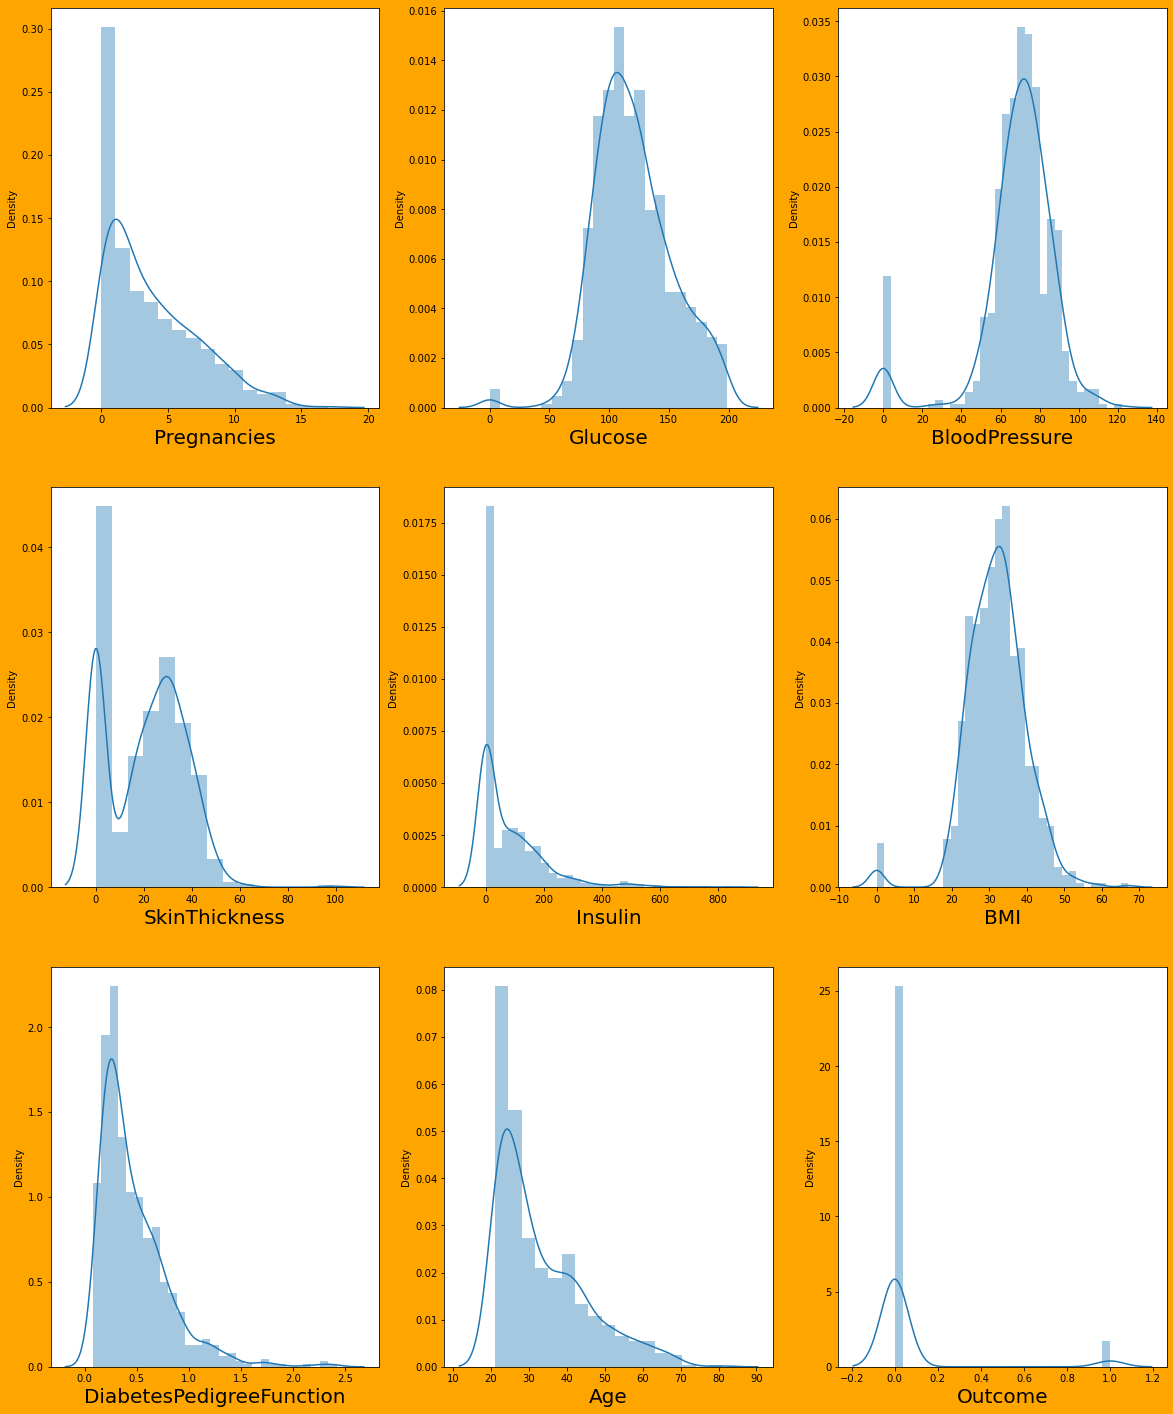

In [5]:
# Analyzing the distribution of every column
plt.figure(figsize=(20,25), facecolor='orange')
plotnumber=1

for column in dt:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [6]:
dt['BMI']=dt['BMI'].replace(0,dt['BMI'].mean())
dt['Glucose']=dt['Glucose'].replace(0,dt['Glucose'].mean())
dt['BloodPressure']=dt['BloodPressure'].replace(0,dt['BloodPressure'].mean())
dt['SkinThickness']=dt['SkinThickness'].replace(0,dt['SkinThickness'].mean())
dt['Insulin']=dt['Insulin'].replace(0,dt['Insulin'].mean())

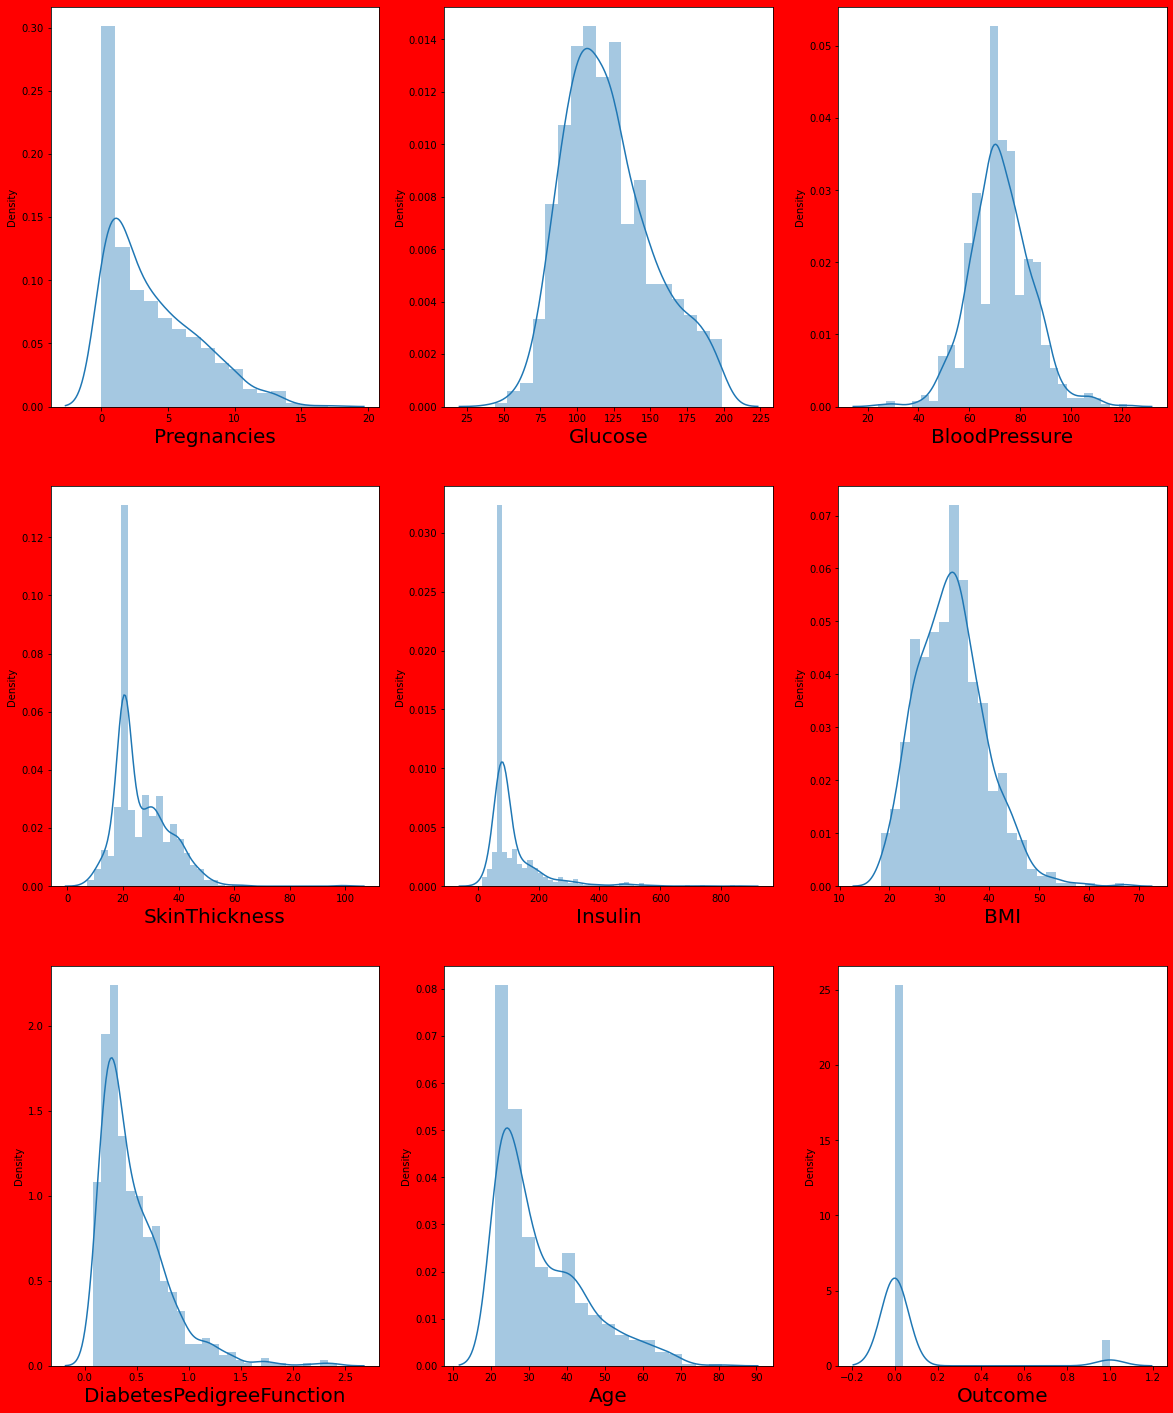

In [7]:
# Analyzing the distribution of every column after replacing the zeros
plt.figure(figsize=(20,25), facecolor='red')
plotnumber=1

for column in dt:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

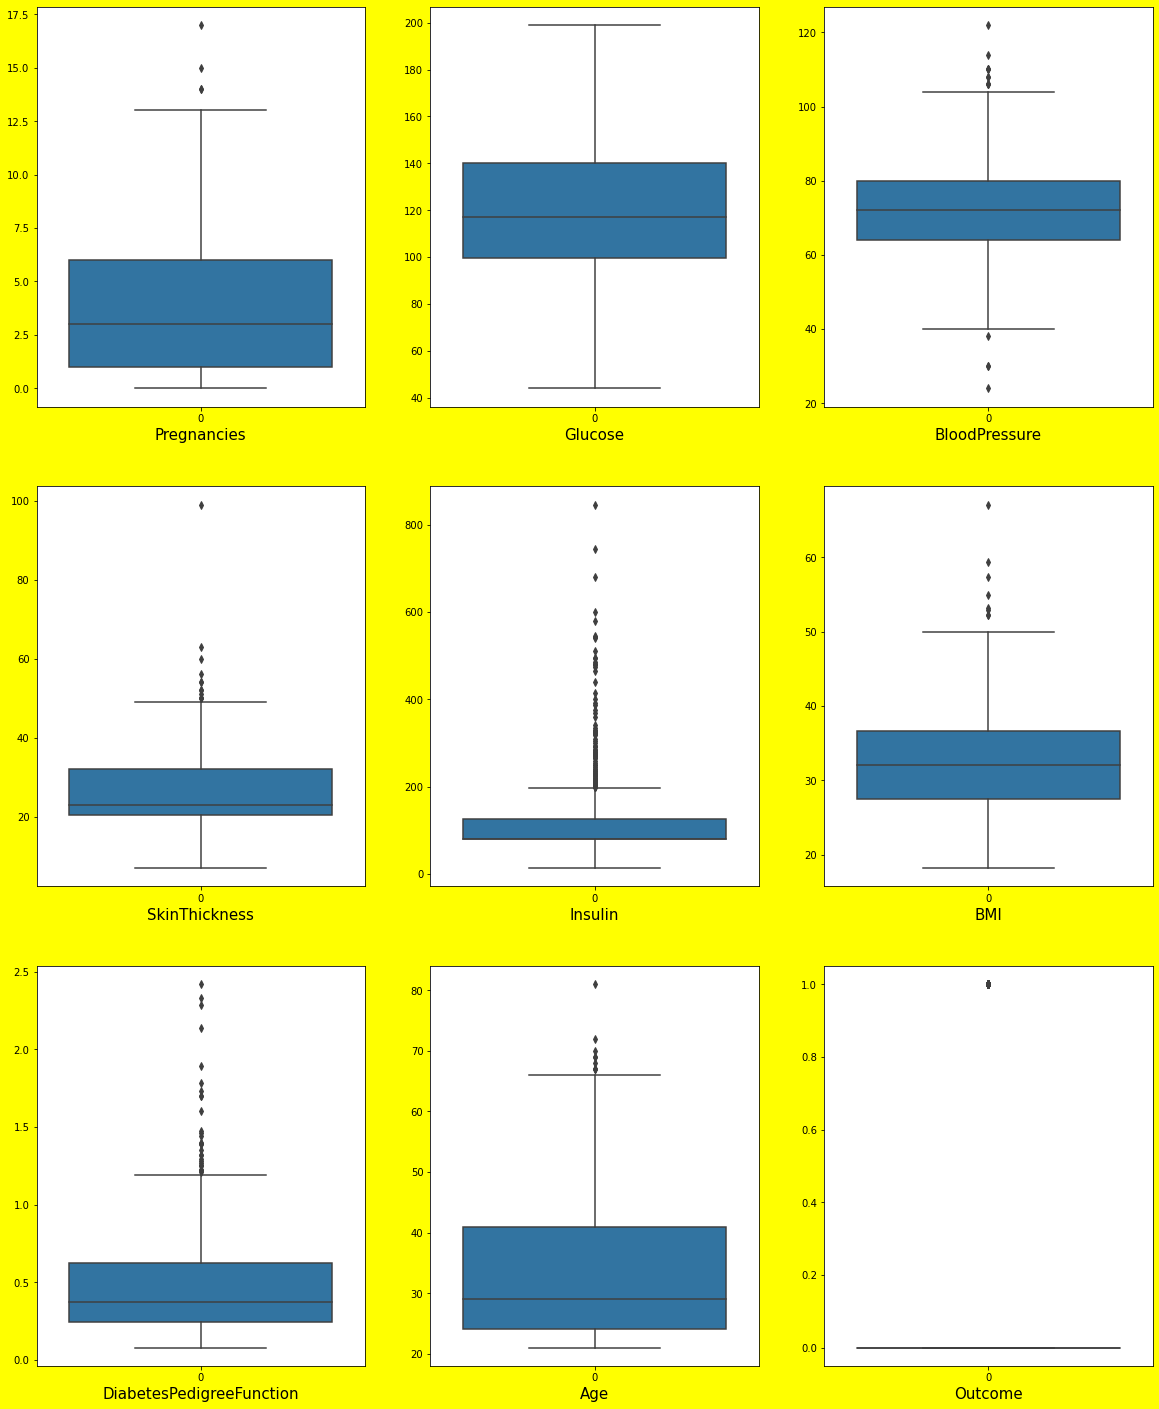

In [8]:
# Visualization using box plot
plt.figure(figsize=(20,25), facecolor='yellow')
plot=1
for column in dt:
    if plot<=9:
        plt.subplot(3,3,plot)
        ax=sns.boxplot(data=dt[column])
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.show()

In [9]:
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [10]:
# Validating one outlier
preg_high=(q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [11]:
# Check the indexes
index=np.where(dt['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [12]:
dt=dt.drop(dt.index[index])
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [14]:
bp_high=(q3.BloodPressure+(1.5*iqr.BloodPressure))
bp_high
ide=np.where(dt['BloodPressure']>bp_high)
dt=dt.drop(dt.index[ide])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [15]:
ide

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [16]:
st_high=(q3.SkinThickness+(1.5*iqr.SkinThickness))
print(st_high)
ide=np.where(dt['SkinThickness']>st_high)
dt=dt.drop(dt.index[ide])
dt.reset_index()

49.1953125


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
ide

(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
       dtype=int64),)

In [18]:
ins_high=(q3.Insulin+(1.5*iqr.Insulin))
print(st_high)
ide=np.where(dt['Insulin']>ins_high)
dt=dt.drop(dt.index[ide])
dt.reset_index()

49.1953125


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
dpf_high=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(dpf_high)
ide=np.where(dt['DiabetesPedigreeFunction']>dpf_high)
dt=dt.drop(dt.index[ide])
dt.reset_index()

1.2


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
629,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
630,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
631,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
632,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)
ide=np.where(dt['Age']>age_high)
dt=dt.drop(dt.index[ide])
dt.reset_index()

66.5


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
620,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
621,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
622,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
623,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
bp_low=(q3.BloodPressure-(1.5*iqr.BloodPressure))
print(bp_high)
ide=np.where(dt['BloodPressure']<bp_low)
dt=dt.drop(dt.index[ide])
dt.reset_index()

104.0


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
574,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
575,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
576,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
577,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


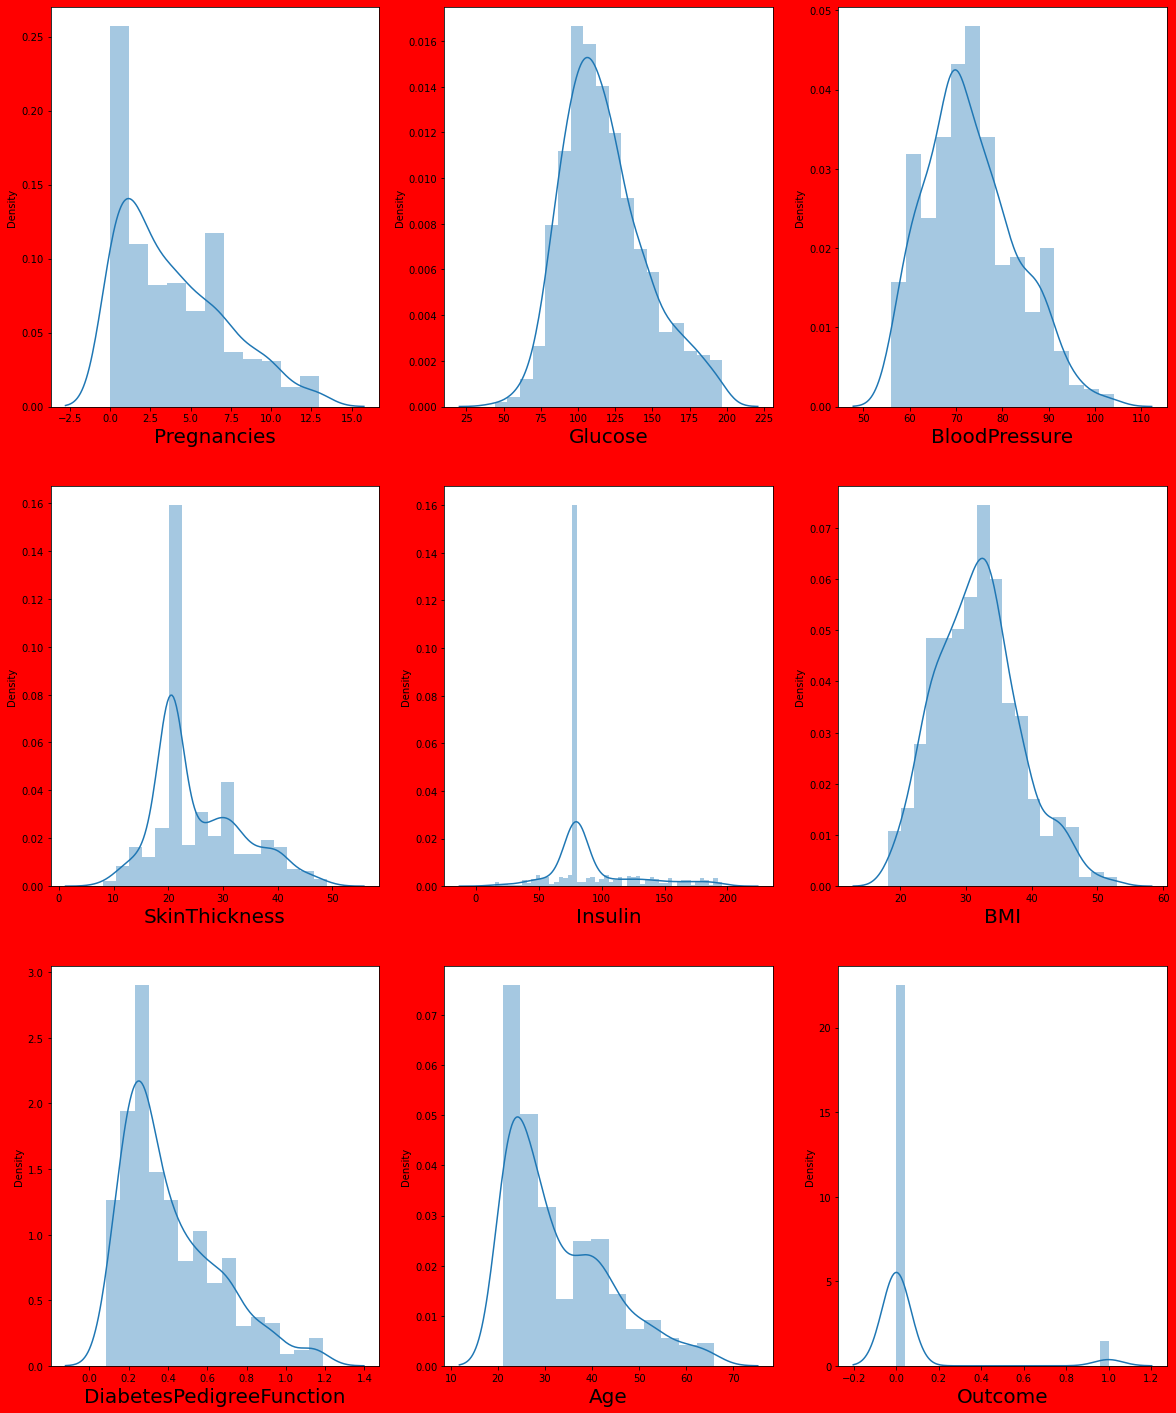

In [22]:
# Analyzing the distribution of every column after removing outliers
plt.figure(figsize=(20,25), facecolor='red')
plotnumber=1

for column in dt:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [23]:
X=dt.drop(columns= 'Outcome')
y=dt['Outcome']

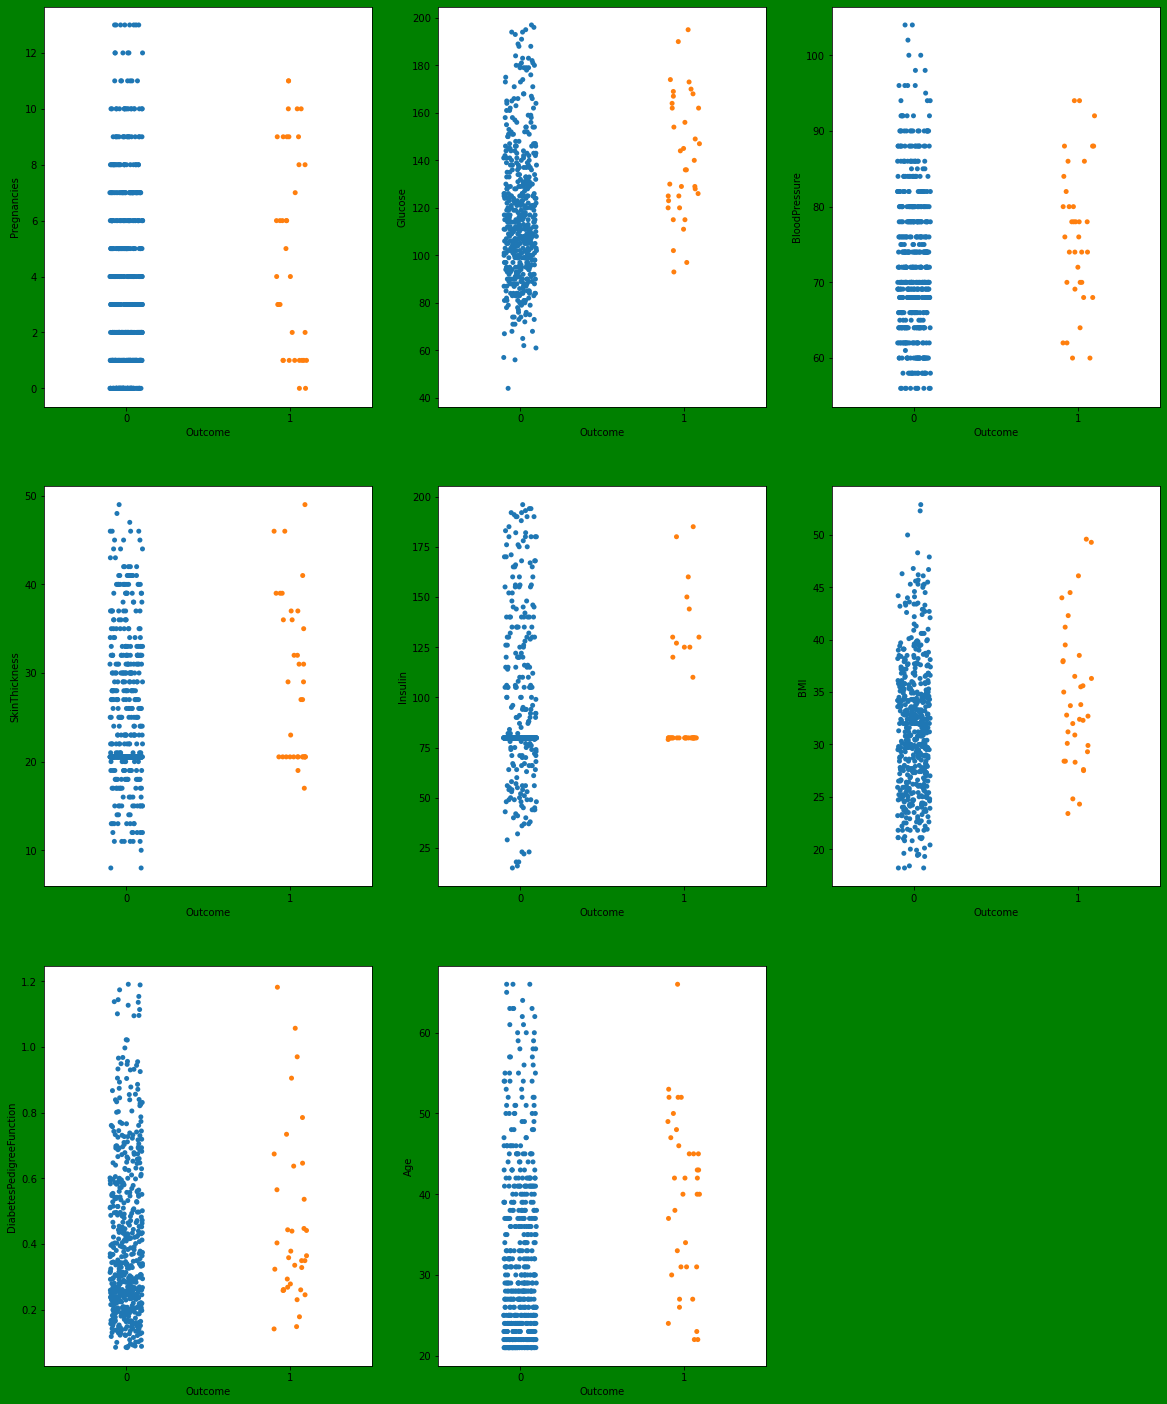

In [24]:
# Plotting stripplot for finding the correlation
plt.figure(figsize=(20,25), facecolor='green')
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()

In [25]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [26]:
X_scaled.shape[1]

8

In [27]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    return(vif)
X = dt.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Pregnancies,1.466656
1,Glucose,1.243977
2,BloodPressure,1.250090
3,SkinThickness,1.349734
4,Insulin,1.179290
5,BMI,1.387173
6,DiabetesPedigreeFunction,1.030632
7,Age,1.673254


In [28]:
# Train test split of the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25, random_state=355)

In [29]:
# fitting the dataset to the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=lr.predict(x_test)

In [31]:
a=accuracy_score(y_test,y_pred)
a

0.9172413793103448

In [32]:
c=confusion_matrix(y_test,y_pred)
c

array([[133,   2],
       [ 10,   0]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       135
           1       0.00      0.00      0.00        10

    accuracy                           0.92       145
   macro avg       0.47      0.49      0.48       145
weighted avg       0.87      0.92      0.89       145

